<a href="https://colab.research.google.com/github/sahilaf/Ai-lab/blob/main/Weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/sahilaf/Data/refs/heads/main/Temp_and_rain.csv")
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [56]:
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Line Plot of Rainfall Trends Over Time (1901-2015)

<ipython-input-57-821a6a8dd162>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='rain', data=df, estimator='mean', ci=None, color='blue')


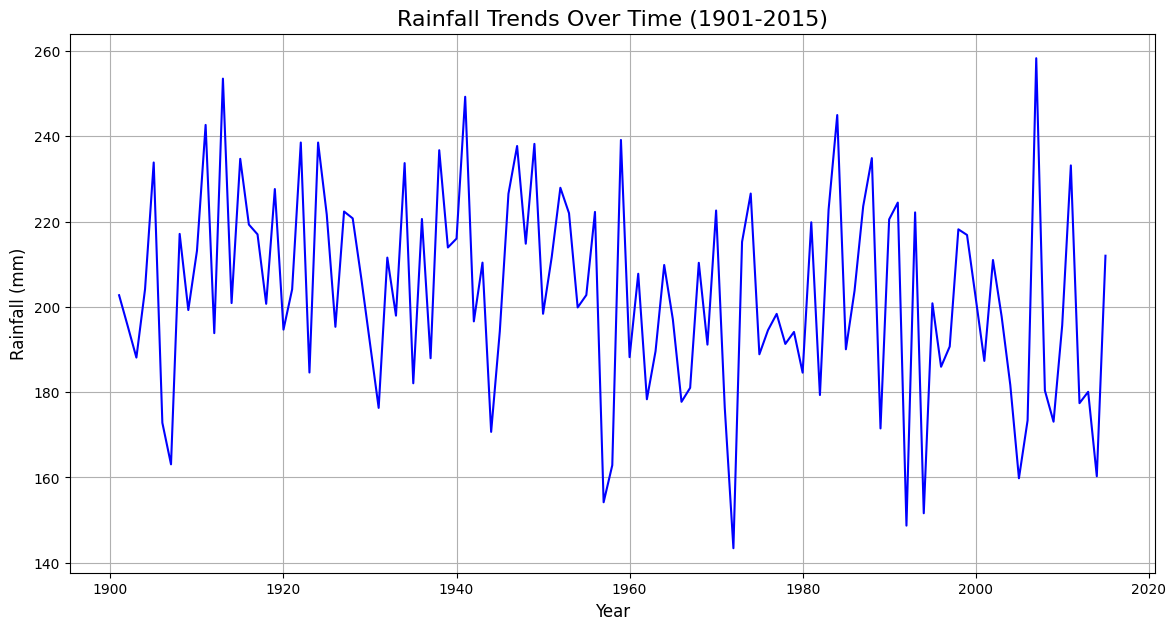

In [57]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='rain', data=df, estimator='mean', ci=None, color='blue')
plt.title('Rainfall Trends Over Time (1901-2015)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid(True)
plt.show()

# Box Plot of Monthly Rainfall Trends (1901-2015)

<ipython-input-58-012f9bc0b976>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='rain', data=df, palette='coolwarm')


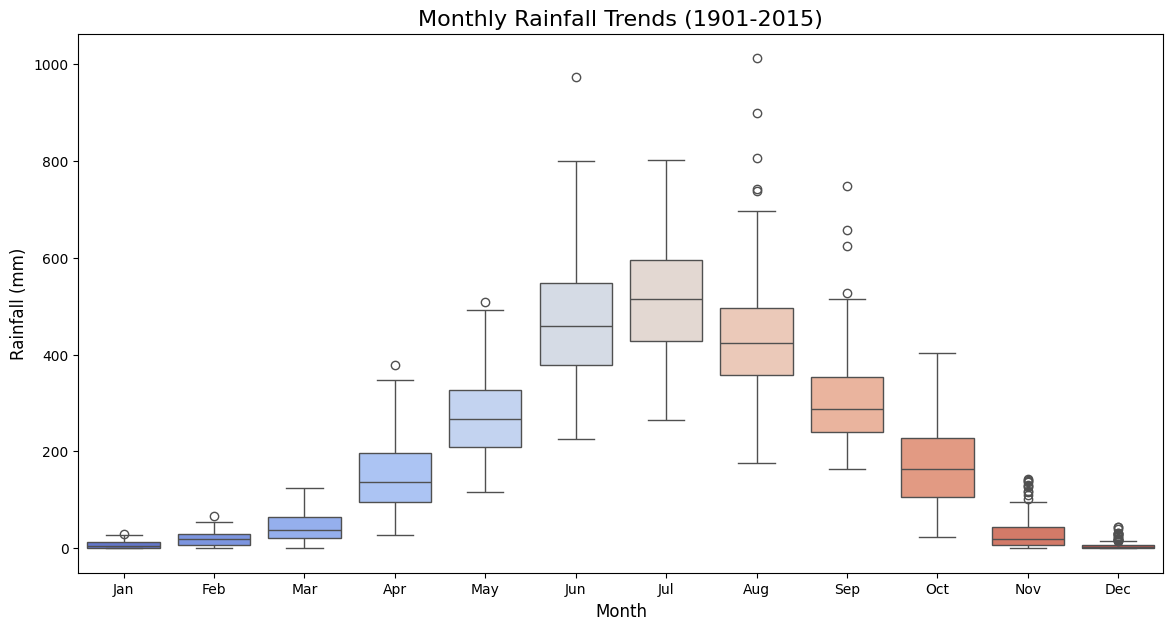

In [58]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='rain', data=df, palette='coolwarm')
plt.title('Monthly Rainfall Trends (1901-2015)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Scatter Plot of Rainfall vs Temperature

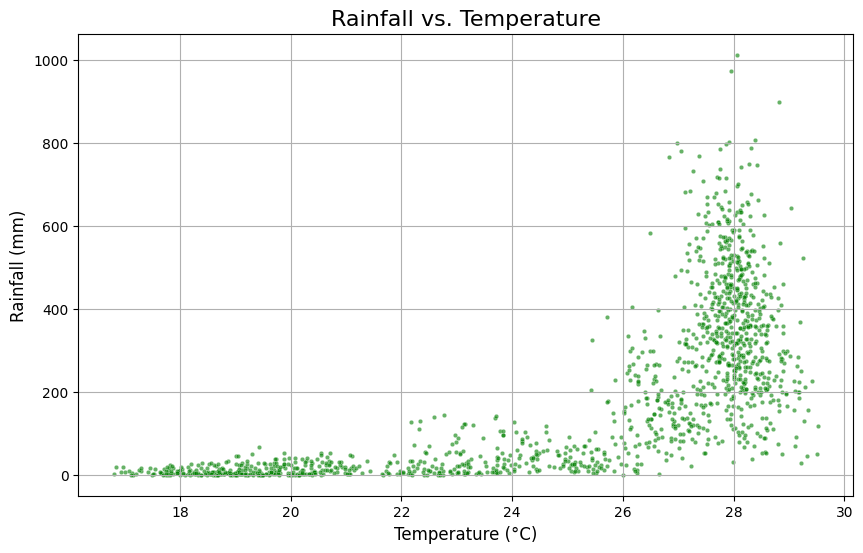

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tem', y='rain', data=df, color='green', s=10, alpha=0.6)
plt.title('Rainfall vs. Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid(True)
plt.show()



Accuracy on Test Set: 0.8260869565217391
Confusion Matrix (Test Set):
[[106   0   9]
 [ 11   0  28]
 [  0   0 122]]


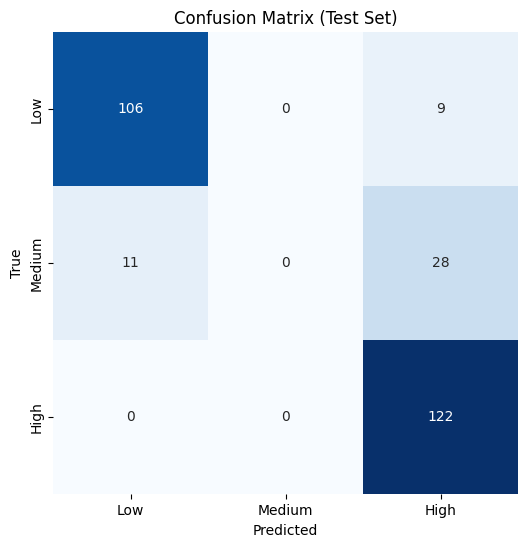


Hold-Out Set Comparison:
      Actual  Predicted  Match
377        2          2   True
548        2          2   True
979        2          2   True
1149       2          2   True
481        0          0   True
76         2          2   True
67         2          2   True
1096       2          2   True
584        2          2   True
824        2          2   True

Accuracy on Hold-Out Set: 0.8297101449275363
Confusion Matrix (Hold-Out Set):
[[117   0  14]
 [  5   0  24]
 [  4   0 112]]


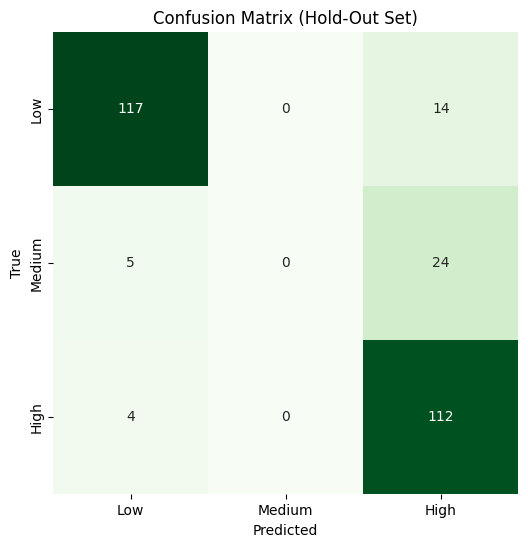

In [69]:

def categorize_rainfall(rainfall):
    if rainfall < 100:
        return 'Low'
    elif 100 <= rainfall < 200:
        return 'Medium'
    else:
        return 'High'

df['rain_category'] = df['rain'].apply(categorize_rainfall)

X = df[['tem', 'Month', 'Year']]
y = df['rain_category']

y_encoded = pd.get_dummies(y, drop_first=False).idxmax(axis=1).map({'Low': 0, 'Medium': 1, 'High': 2})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_test, X_holdout, y_train_test, y_holdout = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy on Test Set: {accuracy}")
print("Confusion Matrix (Test Set):")
print(conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_holdout_pred = model.predict(X_holdout)

holdout_comparison = pd.DataFrame({
    'Actual': y_holdout,
    'Predicted': y_holdout_pred
})
holdout_comparison['Match'] = holdout_comparison['Actual'] == holdout_comparison['Predicted']

print("\nHold-Out Set Comparison:")
print(holdout_comparison.head(10))

holdout_accuracy = accuracy_score(y_holdout, y_holdout_pred)
holdout_conf_matrix = confusion_matrix(y_holdout, y_holdout_pred)

print(f"\nAccuracy on Hold-Out Set: {holdout_accuracy}")
print("Confusion Matrix (Hold-Out Set):")
print(holdout_conf_matrix)

plt.figure(figsize=(6, 6))
sns.heatmap(holdout_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (Hold-Out Set)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

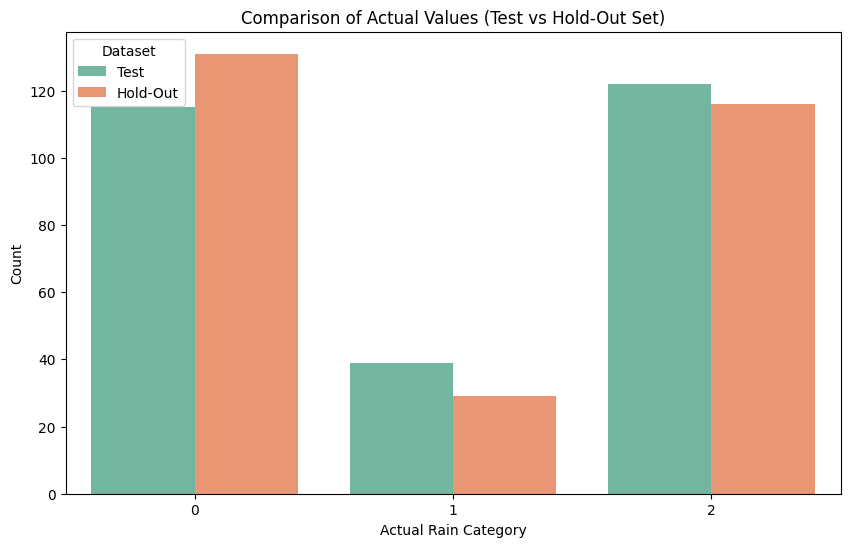

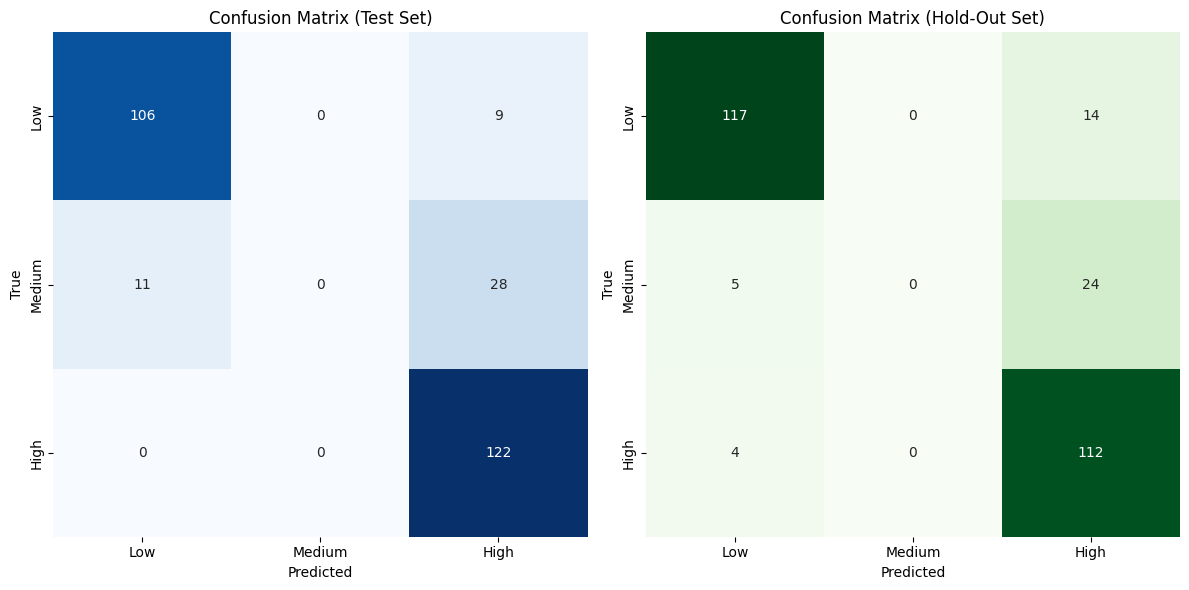

In [70]:

test_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
test_comparison['Match'] = test_comparison['Actual'] == test_comparison['Predicted']

holdout_comparison = pd.DataFrame({
    'Actual': y_holdout,
    'Predicted': y_holdout_pred
})
holdout_comparison['Match'] = holdout_comparison['Actual'] == holdout_comparison['Predicted']

comparison_df = pd.concat([
    test_comparison.assign(Dataset='Test'),
    holdout_comparison.assign(Dataset='Hold-Out')
])

plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Dataset', data=comparison_df, palette='Set2')
plt.title('Comparison of Actual Values (Test vs Hold-Out Set)')
plt.xlabel('Actual Rain Category')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=axes[0])
axes[0].set_title('Confusion Matrix (Test Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(holdout_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], ax=axes[1])
axes[1].set_title('Confusion Matrix (Hold-Out Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


In [71]:
data_2016 = pd.DataFrame({
    'Year': [2016] * 12,
    'Month': list(range(1, 13)),
    'tem': [25, 26, 27, 28, 29, 30, 31, 30, 29, 28, 27, 26]
})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_2016[['tem', 'Month', 'Year']])

y_pred_2016 = model.predict(data_scaled)

rain_categories = {0: 'Low', 1: 'Medium', 2: 'High'}
predicted_categories = [rain_categories[pred] for pred in y_pred_2016]

data_2016['Predicted_Rain_Category'] = predicted_categories

print(data_2016[['Month', 'Predicted_Rain_Category']])


    Month Predicted_Rain_Category
0       1                     Low
1       2                     Low
2       3                     Low
3       4                     Low
4       5                    High
5       6                    High
6       7                    High
7       8                    High
8       9                    High
9      10                     Low
10     11                     Low
11     12                     Low
